## Linear Regression - Ordinary Least Squares (OLS) Method 

We will perform linear regression using
- Scikit Learn's OLS model
- Manually coded OLS method


The sklearn OLS implementation code is given in this notebook. You will have to implement the OLS method manually on the given dataset (OLS_Data.csv).


### OLS

OLS is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being predicted) in the given dataset and those predicted by the linear function.

OLS finds the optimal parameters by computing a closed-form solution for the **Normal equation**.

URL: https://scikit-learn.org/stable/modules/linear_model.html#linear-model


### Dataset

We will use a dataset (OLS_Data.csv) containing 14 variables (14 dimensional feature)

Input variables:
X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

Output variable: 
y

### Note:
This dataset might have colinearity in the input variables resulting into the singularity problem. It might cause the OLS method not working. You may need to fix the singularity problem.

# Part 1: OLS Linear Regression Using Python 

In [24]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load Data

First load the data and explore the feature names, target names, etc.

Download the "OLS_Data.csv" file to load data from it.

In [30]:
# load the csv file as a Pandas DataFrame object denoted as "df"

import pandas as pd

df = pd.read_csv('/Users/yingshanli/CSCE878 intro ML/Recitation/Recitation 8/OLS_Data.csv')


# Quick Check of the Data

Let’s take a look at the top five rows using the DataFrame’s head() method.


In [26]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,0.00632,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,0.02731,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,0.02729,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,0.03237,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,0.06905,36.2


# Description of the Data

DataFrame’s info() method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
X1     506 non-null float64
X2     506 non-null float64
X3     506 non-null float64
X4     506 non-null int64
X5     506 non-null float64
X6     506 non-null float64
X7     506 non-null float64
X8     506 non-null float64
X9     506 non-null int64
X10    506 non-null int64
X11    506 non-null float64
X12    506 non-null float64
X13    506 non-null float64
X14    506 non-null float64
y      506 non-null float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


## Data Matrix: Feature Correlations

Check if the data matrix has colinearity (1 or close to 1) in its features.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a187ef668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a162d5c50>]], dtype=object)

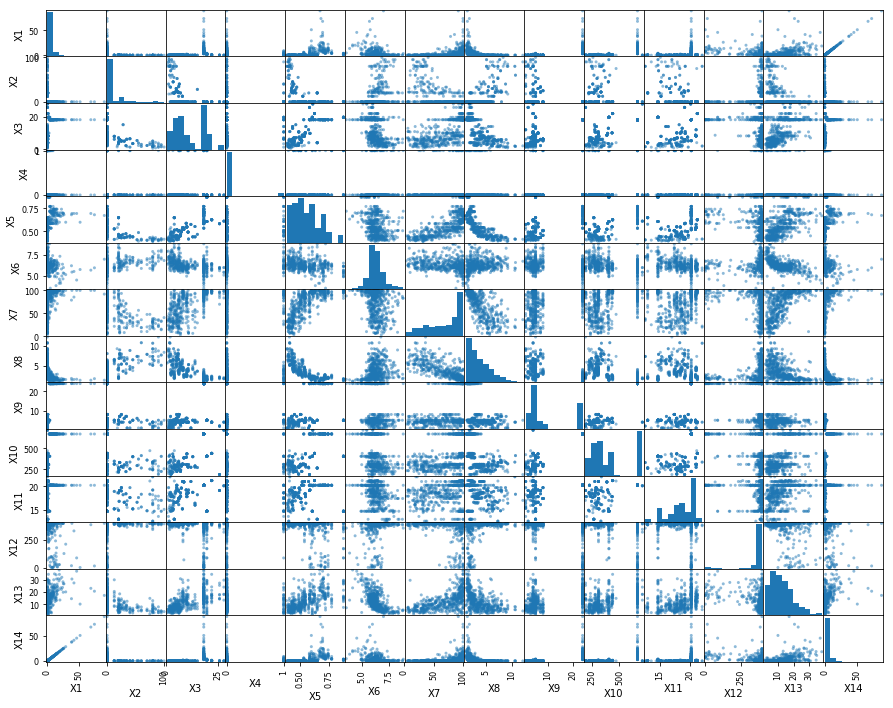

In [12]:
from pandas.tools.plotting import scatter_matrix


attributes = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14"]

scatter_matrix(df[attributes], figsize=(15, 12))

** X1 is highly corelated with X14**

# Create a Separate Feature Set (Data Matrix X) and Target (1D Vector y)

Create a data matrix (X) that contains all features and a 1D target vector (y) containing the target.



In [28]:
# data matrix X
X = df.iloc[:,0:13]

# target vector y

y = df.iloc[:, 14]

print(X.shape)
print(y.shape)

(506, 13)
(506,)


# Scale The Features

We should ensure that all features have a similar scale. Otherwise optimization algorithms (e.g., Gradient Descent based algorithms) will take much longer time to converge.

Also, regularization techniques are sensitive to the scale of data. Thus, we must scale the features before applying regularization.

Use sklearns StandardScaler().

In [37]:
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler().fit_transform(X)

scaled_X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ..., 
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

# Create Train and Test Dataset

Create train and test data (80% & 20%) by usinf sklearn's train_test_split function

It should return the following 4 matrices.
X_train
y_train
X_test
y_test

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(404, 13)
(102, 13)
(404,)
(102,)


## Linear Regression Models

We will use the following linear regression models.

- Ordinary least squares (OLS) Linear Regression (by solving the Normal Equation)



## Evaluation Metrics

We will use two evaluation metrics.

- Mean Squared Error (MSE)
- Coefficient of Determination ($R^2$ or $r^2$)


### Note on $R^2$:
R-squared is a statistical measure of how close the data are to the fitted regression line. 

R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

$R^2 = \frac{Explained Variation}{Total Variation}$

R-squared is always between 0 and 100%:

- 0% indicates that the model explains none of the variability of the response data around its mean.
- 100% indicates that the model explains all the variability of the response data around its mean.


#### <font color=red>In general, the higher the R-squared, the better the model fits your data.</font>


#### Compute $R^2$ using the sklearn:

- The "r2_score" function from sklearn.metrics

#### Compute MSE using the sklearn:

- The "mean_squared_error" function from sklearn.metrics


## Sklearn Ordinary Least Squares (OLS) Linear Regression (by solving the Normal Equation)


#### Sklearn's OLS model implementation code is given for you to review.

Then, you will have to manually code the OLS method.


#### <font color=red>The MSE and $r^2$ error values from your manually coded OLS method must match with sklearn LinearRegressor's obtained values.</font>

In [40]:
# Create the sklearn OLS linear regression object
lin_reg = LinearRegression()


# Train the model
lin_reg.fit(X_train, y_train)


# The intercept
print("Intercept: \n", lin_reg.intercept_)

# The coefficients
print("Coefficients: \n", lin_reg.coef_)


print("\n----------------------------- Model Evaluation -----------------------------")


# Make prediction 
y_train_predicted = lin_reg.predict(X_train)


print("\nMean squared error: %.2f"
      % mean_squared_error(y_train, y_train_predicted))


# To compute 

# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_train, y_train_predicted))

# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % lin_reg.score(X_train, y_train))

Intercept: 
 38.0916949263
Coefficients: 
 [ -1.19443447e-01   4.47799511e-02   5.48526168e-03   2.34080361e+00
  -1.61236043e+01   3.70870901e+00  -3.12108178e-03  -1.38639737e+00
   2.44178327e-01  -1.09896366e-02  -1.04592119e+00   8.11010693e-03
  -4.92792725e-01]

----------------------------- Model Evaluation -----------------------------

Mean squared error: 19.33
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.77
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.77


## Evaluate the Sklearn OLS Model Using Test Data 

We evaluate the trained model on the test data.

The goal is to see how the model performs on the test data.

In [41]:
# Make prediction 
y_test_predicted = lin_reg.predict(X_test)


print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_test_predicted))


# Explained variance score: 1 is perfect prediction
print("Coefficient of determination r^2 variance score [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_predicted))

Mean squared error: 33.45
Coefficient of determination r^2 variance score [1 is perfect prediction]: 0.59


## Manually Coded OLS Solution



In [65]:
# Manually code the OLS Method for Linear Regression


# Add a bias term with the feature vectors to create a new data matrix "X_train_bias"

bias = np.ones(shape=(len(X),100))
X_train_bias = np.append(bias, X, axis=1)

# Print the determinant of the dot product of the transpose of X_train_bias and X_train_bias
print("\nDeterminant of (X_train_bias^T.X_train_bias): ", det(X_train_bias.T.dot(X_train_bias)))

# Computes the dot product of the transpose of X_train_bias with itself
#  Denote the product as "z"

z = X_train_bias.T.dot(X_train_bias)

# Closed form (OLS) solution for weight vector w 

def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x
    return(b_0)

a = estimate_coef(X, y)

print("\nThe weight vector:\n", a)




print("\n----------------------------- Model Evaluation -----------------------------")



# Make prediction using the X_train_bias data matrix
# The predicted target vector should be named as "y_train_predicted"


# Compute the MSE
print("Mean squared error:")


# Compute the r^2 score
print("Coefficient of determination r^2 variance score [1 is perfect prediction]:")



Determinant of (X_train_bias^T.X_train_bias):  0.0

The weight vector:
 X1     -23.633644
X2     -15.040764
X3      -2.673230
X4     223.560784
X5      -1.966655
X6      -1.903136
X7      -2.224676
X8      -2.519188
X9      -3.691018
X10     -2.228731
X11     -1.905703
X12     -2.011473
X13     -2.541983
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10            NaN
11            NaN
12            NaN
13            NaN
14            NaN
15            NaN
16            NaN
          ...    
476           NaN
477           NaN
478           NaN
479           NaN
480           NaN
481           NaN
482           NaN
483           NaN
484           NaN
485           NaN
486           NaN
487           NaN
488           NaN
489           NaN
490           NaN
491           NaN
492           NaN
493           NaN
494           NaN
495           NaN
496      

/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3140: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)
/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5799: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return_indexers=True)


## Observation on the Performance of the Manually Coded OLS Solution

You might get the **Singularity matrix** error.

The determinant of the $X_{bias}^T.X_{bias}$ should be 0.

There must be colinearity in the columns of the data matrix X.

Find which columns are coliner.


## Applying OLS Method on Data Matrix With Colinearity in Columns

Solve the singularity problem can by adding small positive numbers on the diagonal of the $X_{bias}^T.X_{bias}$ matrix.

This regularization technique is known as **Ridge Regression**.


In [43]:
# Bayesian (Regularized) OLS Method for Linear Regression: Ridge Regression



# Add a bias term with the feature vectors to create a new data matrix "X_train_bias"



# Print the determinant of the dot product of the transpose of X_train_bias and X_train_bias
print("\nDeterminant of (X_train_bias^T.X_train_bias): ")


# Computes the dot product of the transpose of X_train_bias with itself
#  Denote the product as "z"




print("\n-------- Fixing the Singularity of (X_bias^T).X_bias ------------")

# Create a diagonal matrix that has the dimension of z; name the matrix as "diagonal"


# Add small positive non-zero numbers on the diagonal




# Closed form (OLS) solution for weight vector w 




print("\nThe weight vector:\n")



print("\n----------------------------- Model Evaluation -----------------------------")



# Make prediction using the X_train_bias data matrix
# The predicted target vector should be named as "y_train_predicted"


# Compute the MSE
print("Mean squared error:")


# Compute the r^2 score
print("Coefficient of determination r^2 variance score [1 is perfect prediction]:")



Determinant of (X_train_bias^T.X_train_bias): 

-------- Fixing the Singularity of (X_bias^T).X_bias ------------

The weight vector:


----------------------------- Model Evaluation -----------------------------
Mean squared error:
Coefficient of determination r^2 variance score [1 is perfect prediction]:


## Evaluate the Model Using Test Data - OLS Linear Regression

We evaluate the trained model on the test data.

Compute the MSE and $r^2$ score using the test data.

In [47]:
print("\nMean squared error of test data: %.2f"
      % mean_squared_error(y_test, y_test_predicted))

# Explained variance score for test data: 1 is perfect prediction
print("Coefficient of determination r^2 variance score for test data [1 is perfect prediction]: %.2f" % r2_score(y_test, y_test_predicted))



Mean squared error of test data: 33.45
Coefficient of determination r^2 variance score for test data [1 is perfect prediction]: 0.59


# Part 2: Understanding the Singularity Issue and its Solution 

1) Why do you think the singularity matrix error occur while using OLS method on the “OLS_Data.csv” dataset?


Answer: Because feature X1 is the same with feature X14, causing the colinearity between columns.

2) To fix the singularity problem of the $X_{bias}^T.X_{bias}$ matrix what non-zero positive number did you add on its diagonal?


Answer: Add small positive number on its diagonal.

3) Add 100000 on the diagonal of the $X_{bias}^T.X_{bias}$ matrix and report the $MSE$ and the $r^2$ values for the training data set. Explain these results.


Answer:

4) After adding 100000 on the diagonal of the $X_{bias}^T.X_{bias}$ matrix what change did you notice in the weights of the model?

Answer: 